<a href="https://colab.research.google.com/github/vschifter/Data-Science/blob/master/Analisando_os_Dados_do_Airbnb_Pequim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Pequim*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Pequim, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Os dados utilizados neste projeto foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Beijing (good
for visualisations).*

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/china/beijing/beijing/2020-05-27/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id fo proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89425,116.45089,Entire home/apt,845,2,99,2020-01-06,0.83,5,331
1,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1198,1,2,2017-10-08,0.06,4,0
2,114384,CBD Luxury 1-bedroom suite with a 30m2 terrace,533062,北京公寓,NaN,朝阳区 / Chaoyang,39.90474,116.46372,Entire home/apt,601,1,66,2020-01-04,0.73,5,331
3,114465,CBD Spacious Luxury Suite with 30 sqm terrace,533062,北京公寓,NaN,朝阳区 / Chaoyang,39.90441,116.46524,Entire home/apt,601,1,10,2019-10-06,0.11,5,331
4,128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,东城区,39.93235,116.42254,Entire home/apt,415,3,290,2020-01-19,2.65,1,146


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
O primeiro passo da análise é identificar a quantidade de entradas que o conjunto de dados possui e o tipo de dado que está armazenado em cadas coluna.

Este *dataset* que está sendo utilizado é uma versão "resumida" que foi disponibilizada pelo Airbnb. Na mesma página em que o arquivo `listings.csv` foi baixado, há uma versão mais completa com 36864 entradas e 106 variáveis (`listings.csv.gz`).


In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 36864
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada com à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos em relação ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.

* As variáveis `name` e `host_name` têm um valor abaixo de 0,01% de valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.422906
last_review                       0.422906
host_name                         0.000407
name                              0.000027
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Usarei um histograma para identificar a distribuição das variáveis.

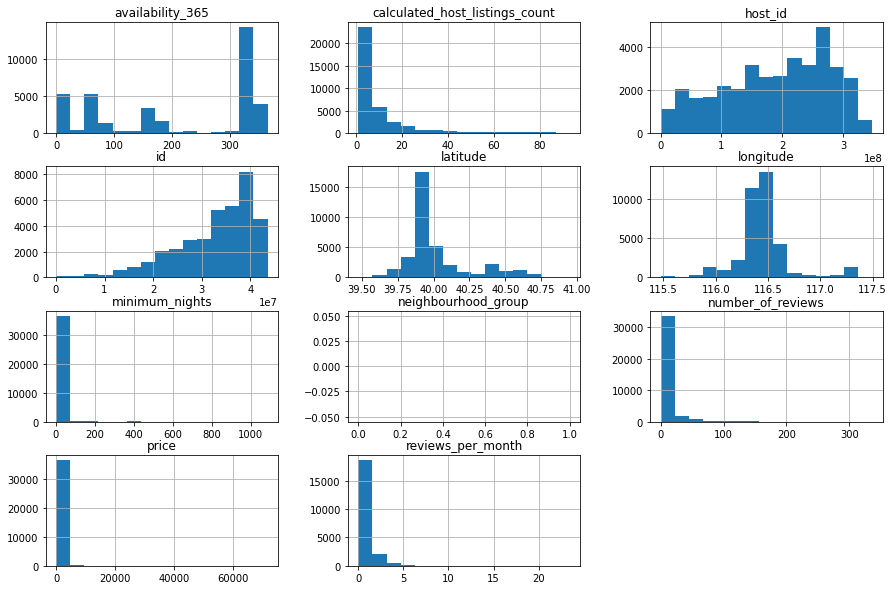

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price` e `minimum_nights`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`.
* Plotar `boxplots`para a variável.


In [7]:
# ver o resumo estatítico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]. describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36864.000000,36864.000000,36864.000000,21274.000000,36864.000000,36864.000000
mean,709.095757,4.216146,7.004612,0.696611,9.932129,208.484402
std,1765.468881,27.541209,17.284460,0.898169,14.312800,138.551844
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,257.000000,1.000000,0.000000,0.150000,2.000000,57.000000
50%,399.000000,1.000000,1.000000,0.340000,5.000000,272.500000
75%,630.000000,1.000000,6.000000,0.870000,11.000000,331.000000
max,71605.000000,1086.000000,336.000000,23.450000,93.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 630, porém seu valor máximo é de 71605.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

### Q4.1. Boxplot para minimum_nights

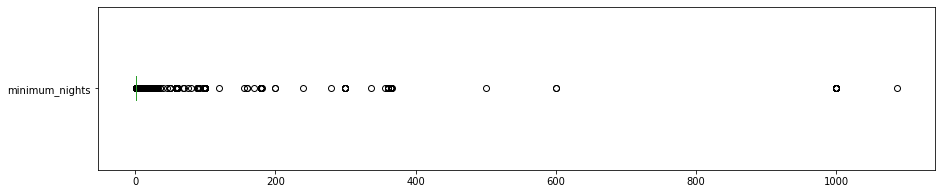

minimum_nightes: valores acima de 30:
472 entradas
1.2804%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nightes: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights>30]) / df.shape[0])*100))

### Q4.2. Boxplot para price

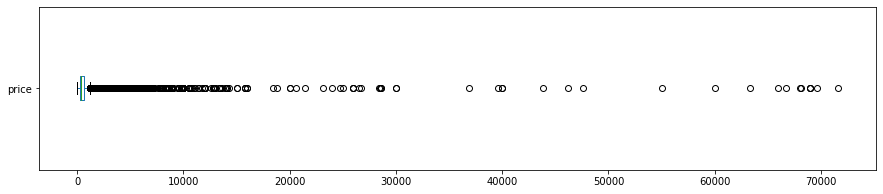

\price: valores acima de 1500
3030 entradas
8.2194%


In [9]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\price: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

### Q4.3. Histograma sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

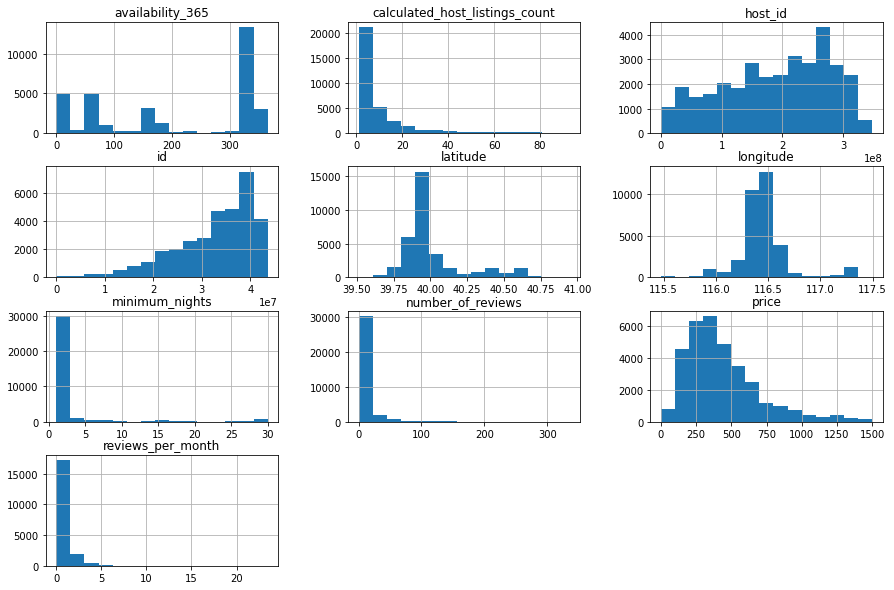

In [10]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

* A média dos preços de aluguel é de 709,10 por diária.
* Vemos que o valor máximo cobrado em uma noite é de 71.605,00, possivelmente temos vários dados com valores próximos a esse e isso está afetando a média do dataframe.

In [11]:
# ver a média da coluna `price`
df['price'].describe()


count    36864.000000
mean       709.095757
std       1765.468881
min          0.000000
25%        257.000000
50%        399.000000
75%        630.000000
max      71605.000000
Name: price, dtype: float64

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [12]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.008631,-0.048931,-0.045222,-0.019074,0.028555
minimum_nights,-0.008631,1.000000,0.000174,-0.000492,0.008138,0.009704
number_of_reviews,-0.048931,0.000174,1.000000,0.800772,-0.088382,-0.123704
reviews_per_month,-0.045222,-0.000492,0.800772,1.000000,-0.089863,-0.144074
calculated_host_listings_count,-0.019074,0.008138,-0.088382,-0.089863,1.000000,0.160988
availability_365,0.028555,0.009704,-0.123704,-0.144074,0.160988,1.000000


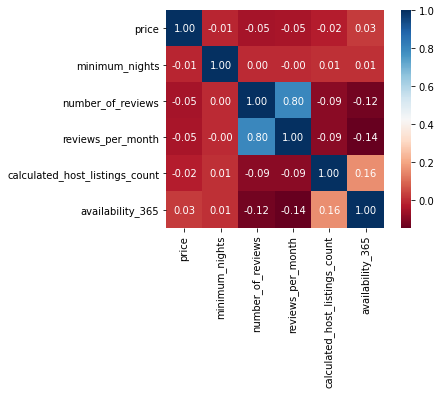

In [13]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `valeu_counts()`.

* O tipo de imóvel mais alugado no Airbnb em Pequim é do tipo casa inteira.
* Na segunda posição temos o quarto privado, seguido de quarto compartilhado.

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    22628
Private room       12543
Shared room         1693
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.613824
Private room       0.340251
Shared room        0.045926
Name: room_type, dtype: float64

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


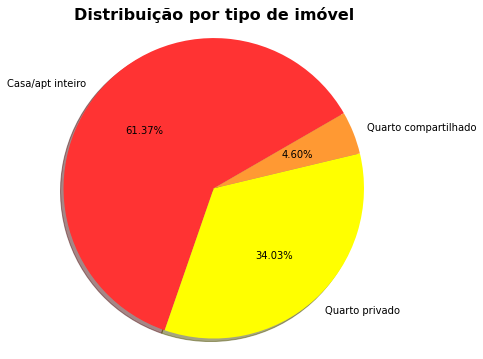

<Figure size 432x288 with 0 Axes>

In [16]:
# gerar gráfico de acordo com o tipo de imóvel disponível 

x_list = [61.38, 34.04, 4.60]

labels = ['Casa/apt inteiro', 'Quarto privado', 'Quarto compartilhado']

cores = ['#ff3333', '#ffff00', '#ff9933']

plt.figure(figsize=(6,6))

plt.pie(x_list, labels=labels, autopct='%1.2f%%', colors=cores, startangle=30, shadow=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16};

plt.title('Distribuição por tipo de imóvel', **font)

plt.axis('equal')

plt.show()

plt.savefig('Distribuição.png', transparent=True)


### **Q8. Qual a localidade mais cara do dataset?**



In [17]:
df.neighbourhood.value_counts()[:10]

朝阳区 / Chaoyang    11893
东城区                3734
海淀区                3323
丰台区 / Fengtai      2464
延庆县 / Yanqing      2200
西城区                1954
密云县 / Miyun        1918
通州区 / Tongzhou     1656
昌平区                1570
怀柔区 / Huairou      1558
Name: neighbourhood, dtype: int64

In [18]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
怀柔区 / Huairou       650.797619
延庆县 / Yanqing       569.866377
密云县 / Miyun         567.371359
东城区                 563.966076
平谷区 / Pinggu        511.934426
西城区                 482.513077
门头沟区 / Mentougou    433.730594
朝阳区 / Chaoyang      403.127202
顺义区 / Shunyi        402.524045
石景山区                399.487805
Name: price, dtype: float64

In [19]:
print(df_clean[df_clean.neighbourhood == "怀柔区 / Huairou"].shape)

df_clean[df_clean.neighbourhood == "怀柔区 / Huairou"]

(1008, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
78,2797791,Beijing Great Wall Escape,14311129,Andrew,怀柔区 / Huairou,40.47329,116.54511,Entire home/apt,949,1,52,2019-10-03,0.70,1,363
92,3389315,Lovely Great Wall Country House,4638979,Patrick,怀柔区 / Huairou,40.44715,116.44703,Entire home/apt,1499,2,29,2019-09-08,0.41,1,89
136,4152653,Hillside countryhome by great walls,20303446,Mic,怀柔区 / Huairou,40.44871,116.44203,Entire home/apt,1070,7,12,2017-04-03,0.20,1,0
175,5101112,Family travel cottage 怀北滑雪场别墅区,23433047,Doris,怀柔区 / Huairou,40.28642,116.63912,Private room,264,1,1,2018-05-01,0.04,2,365
283,6801565,Zhang's courtyard,35607486,Janice,怀柔区 / Huairou,40.28983,116.57451,Private room,257,1,1,2016-06-07,0.02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36745,43411025,北京怀柔白河湾桃仙阁主题民宿,308012252,北京怀柔白河湾桃仙阁主题民宿,怀柔区 / Huairou,40.64994,116.67092,Private room,300,1,0,NaN,NaN,2,365
36762,43419485,【幸福花的暖心家】怀柔雁栖湖红螺寺青龙峡周边欧式小镇洋房,85230894,Grace,怀柔区 / Huairou,40.37136,116.66920,Entire home/apt,899,1,1,2020-05-30,1.00,1,90
36805,43469047,"龙泉小苑【北京怀柔独立小院】云蒙山白河湾附近,依山傍水",320151548,薇,怀柔区 / Huairou,40.59359,116.66111,Private room,178,1,0,NaN,NaN,2,365
36831,43502382,长城脚下的院子/风驼院,43747730,不系舟89,怀柔区 / Huairou,40.40630,116.37633,Entire home/apt,1278,1,0,NaN,NaN,3,360


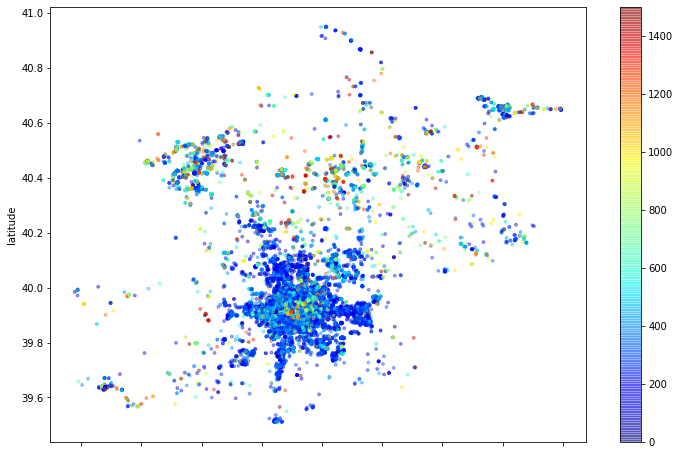

In [20]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [21]:
# ver a média da coluna `minimum_nights`
df['minimum_nights'].describe()

count    36864.000000
mean         4.216146
std         27.541209
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1086.000000
Name: minimum_nights, dtype: float64

## Conclusões
